In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


# Load the dataset (make sure the path is correct)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics and information about the dataset
print("\nDataset Statistics:")
print(df.describe())

print("\nDataset Information:")
print(df.info())



    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [38]:
# Check for missing values and display the result
missing_values = df.isnull().sum()  # Sum of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Handle missing values (if any) - filling with median of 'age' column
df['age'].fillna(df['age'].median(), inplace=True)

# Verify if any missing values remain after filling
missing_values_after = df.isnull().sum()  # Sum of missing values after handling
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values in Each Column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Missing Values After Handling:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<ipython-input-38-34d54bf8355c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


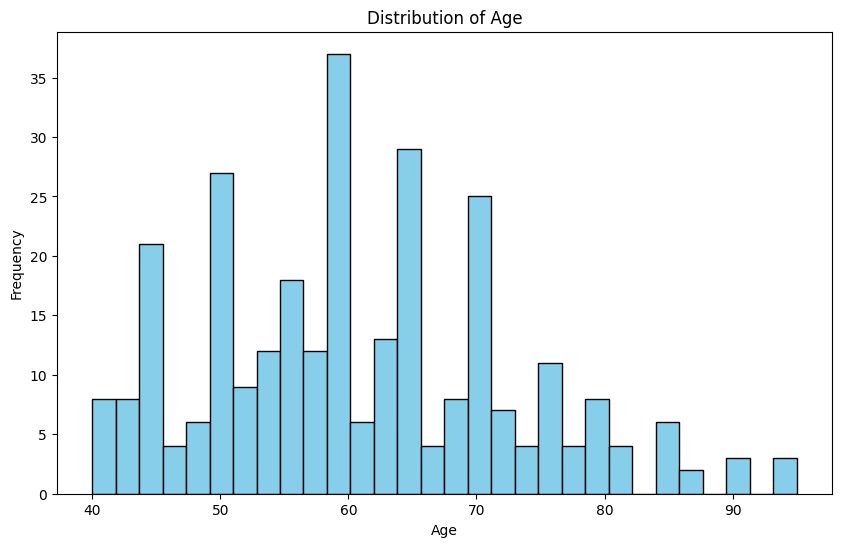

In [39]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


      age  chunk_average_age  chunk_average_positive_noise_age  \
0    75.0              62.00                             64.00   
1    55.0              62.00                             64.00   
2    65.0              62.00                             64.00   
3    50.0              62.00                             64.00   
4    65.0              62.00                             64.00   
..    ...                ...                               ...   
294  62.0              56.40                             58.40   
295  55.0              48.75                             50.75   
296  45.0              48.75                             50.75   
297  45.0              48.75                             50.75   
298  50.0              48.75                             50.75   

     chunk_average_negative_noise_age  data_loss_positive_age  \
0                               60.00                   11.00   
1                               60.00                    9.00   
2           

<ipython-input-40-97f011b54cc1>:143: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


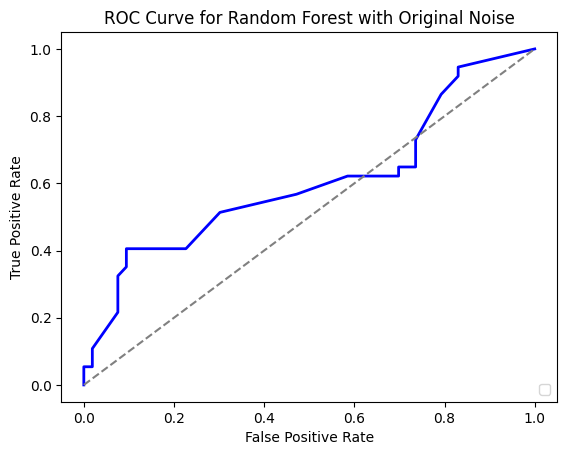

Random Forest | Noise Type: Hybrid
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.74        53
           1       0.62      0.43      0.51        37

    accuracy                           0.66        90
   macro avg       0.64      0.62      0.62        90
weighted avg       0.65      0.66      0.64        90



<ipython-input-40-97f011b54cc1>:143: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


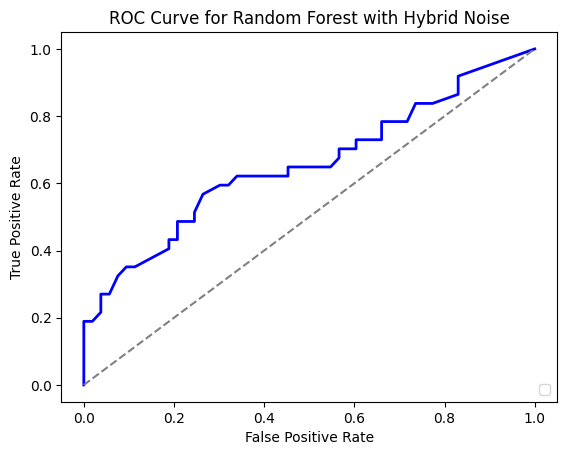

Random Forest | Noise Type: Gaussian
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.63        53
           1       0.38      0.27      0.32        37

    accuracy                           0.52        90
   macro avg       0.48      0.48      0.47        90
weighted avg       0.50      0.52      0.50        90



<ipython-input-40-97f011b54cc1>:143: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


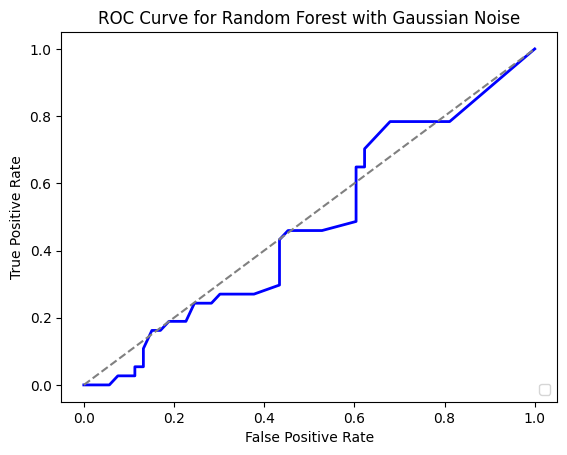

Random Forest | Noise Type: Uniform
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66        53
           1       0.44      0.30      0.35        37

    accuracy                           0.56        90
   macro avg       0.52      0.52      0.51        90
weighted avg       0.53      0.56      0.54        90



<ipython-input-40-97f011b54cc1>:143: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


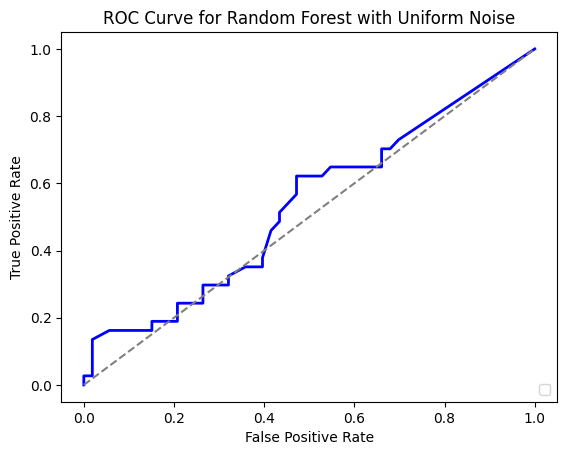

In [40]:

# Define noise functions
def add_gaussian_noise(data, mean=0, std_dev=2):
    noise = np.random.normal(mean, std_dev, size=len(data))
    return data + noise

def add_uniform_noise(data, low=-2, high=2):
    noise = np.random.uniform(low, high, size=len(data))
    return data + noise

import numpy as np
import pandas as pd

def create_hybrid_noise(df, column_name, chunk_size=5, noise_value=2):
    """
    Creates a hybrid noise analysis for a given column in a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        column_name (str): Name of the column to apply noise and calculate data loss.
        chunk_size (int): Number of rows per chunk. Default is 10.
        noise_value (float): Noise value to add/subtract for positive and negative noise. Default is 3.

    Returns:
        pd.DataFrame: DataFrame with additional columns for hybrid noise and data loss analysis.
    """
    # Create empty lists to store results
    chunk_average_list = []
    chunk_average_positive_noise_list = []
    chunk_average_negative_noise_list = []
    data_loss_positive_list = []
    data_loss_negative_list = []
    less_data_loss_value_list = []
    respective_data_loss_type_list = []

    # Iterate over the DataFrame in chunks
    for i in range(0, len(df), chunk_size):
        chunk = df.iloc[i:i + chunk_size]  # Get the current chunk

        # Calculate the chunk's average
        chunk_average = chunk[column_name].mean()

        # Add positive and negative noise to the chunk average
        chunk_average_positive_noise = chunk_average + noise_value
        chunk_average_negative_noise = chunk_average - noise_value

        # Calculate the data loss for both positive and negative noise
        data_loss_positive = np.abs(chunk_average_positive_noise - chunk[column_name])
        data_loss_negative = np.abs(chunk_average_negative_noise - chunk[column_name])

        # Compare data loss values and get the lesser value for each row in the chunk
        less_data_loss_value = np.minimum(data_loss_positive, data_loss_negative)

        # Determine the corresponding noise value for the lesser data loss
        respective_data_loss_value = np.where(data_loss_positive == less_data_loss_value,
                                              chunk_average_positive_noise,
                                              chunk_average_negative_noise)

        # Append results for this chunk to the respective lists
        chunk_average_list.extend([chunk_average] * len(chunk))
        chunk_average_positive_noise_list.extend([chunk_average_positive_noise] * len(chunk))
        chunk_average_negative_noise_list.extend([chunk_average_negative_noise] * len(chunk))
        data_loss_positive_list.extend(data_loss_positive)
        data_loss_negative_list.extend(data_loss_negative)
        less_data_loss_value_list.extend(less_data_loss_value)
        respective_data_loss_type_list.extend(respective_data_loss_value)

    # Add results as new columns to the DataFrame
    df[f'chunk_average_{column_name}'] = chunk_average_list
    df[f'chunk_average_positive_noise_{column_name}'] = chunk_average_positive_noise_list
    df[f'chunk_average_negative_noise_{column_name}'] = chunk_average_negative_noise_list
    df[f'data_loss_positive_{column_name}'] = data_loss_positive_list
    df[f'data_loss_negative_{column_name}'] = data_loss_negative_list
    df[f'less_data_loss_value_{column_name}'] = less_data_loss_value_list
    df[f'respective_data_loss_type_{column_name}'] = respective_data_loss_type_list

    # Return the updated DataFrame
    return df



df_with_hybrid_noise = create_hybrid_noise(df, column_name='age', chunk_size=5, noise_value=2)

# Display the updated DataFrame with relevant columns
df_result_with_noise = df_with_hybrid_noise[['age', 'chunk_average_age',
                                             'chunk_average_positive_noise_age',
                                             'chunk_average_negative_noise_age',
                                             'data_loss_positive_age',
                                             'data_loss_negative_age',
                                             'less_data_loss_value_age',
                                             'respective_data_loss_type_age']]

print(df_result_with_noise)



# Apply noise to the dataset in the specified order
df['age_original'] = df['age']  # Original data
df['age_hybrid']=df['respective_data_loss_type_age']
df['age_gaussian'] = add_gaussian_noise(df['age'])  # Gaussian Noise
df['age_uniform'] = add_uniform_noise(df['age'])  # Uniform Noise

# Prepare features and target variable
X_original = df[['age_original']]
X_hybrid = df[['age_hybrid']]
X_gaussian = df[['age_gaussian']]
X_uniform = df[['age_uniform']]
y = df['DEATH_EVENT']

# Split data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)
X_train_hybrid, X_test_hybrid, _, _ = train_test_split(X_hybrid, y, test_size=0.3, random_state=42)
X_train_gaussian, X_test_gaussian, _, _ = train_test_split(X_gaussian, y, test_size=0.3, random_state=42)
X_train_uniform, X_test_uniform, _, _ = train_test_split(X_uniform, y, test_size=0.3, random_state=42)

# Random Forest model
model = RandomForestClassifier(random_state=42)

# Evaluate model for different noise types
for X_train, X_test, noise_type in zip([X_train_orig, X_train_hybrid, X_train_gaussian, X_train_uniform],
                                       [X_test_orig, X_test_hybrid, X_test_gaussian, X_test_uniform],
                                       ['Original', 'Hybrid', 'Gaussian', 'Uniform']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Random Forest | Noise Type: {noise_type}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Random Forest with {noise_type} Noise')
    plt.legend(loc='lower right')
    plt.show()

#


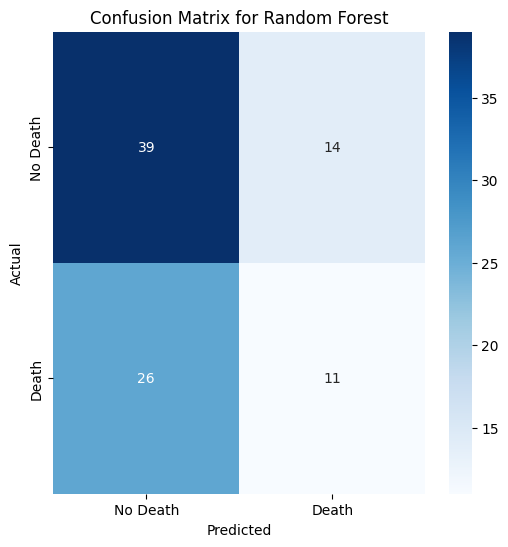

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test is your actual labels and y_pred is your predicted labels
cm = confusion_matrix(y_test, y_pred)  # Replace with predictions for each noise type

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


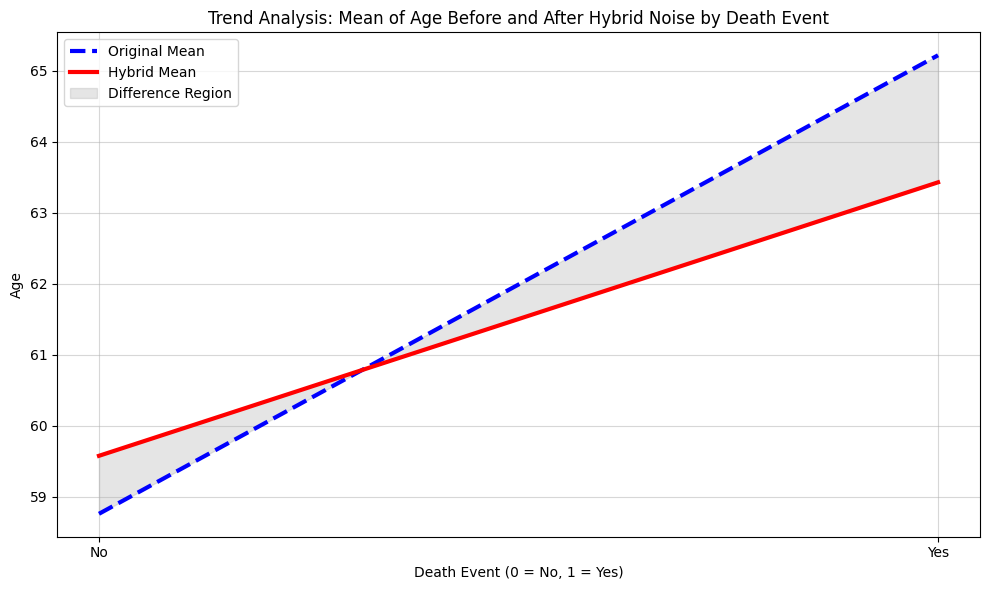

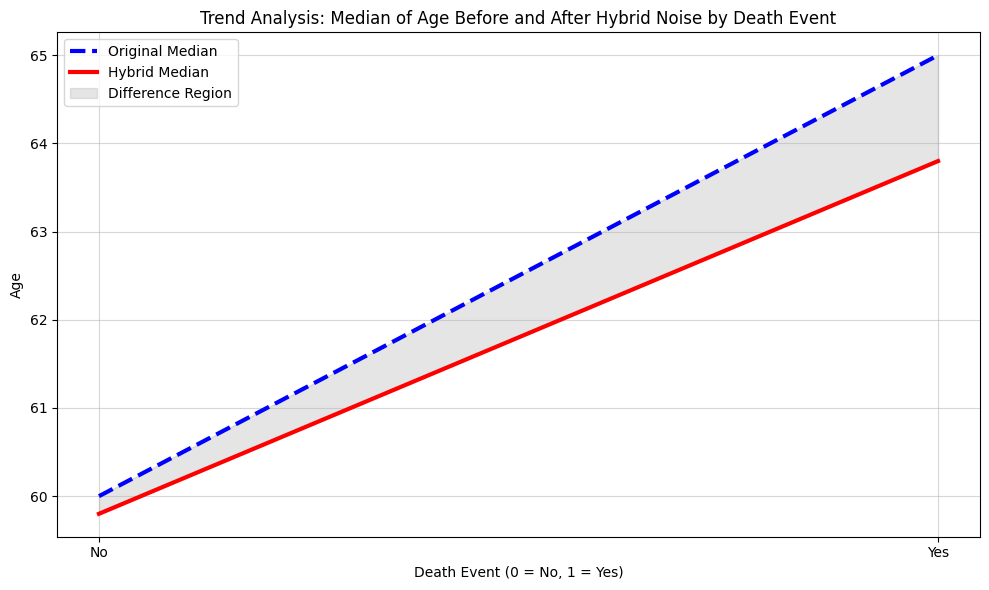

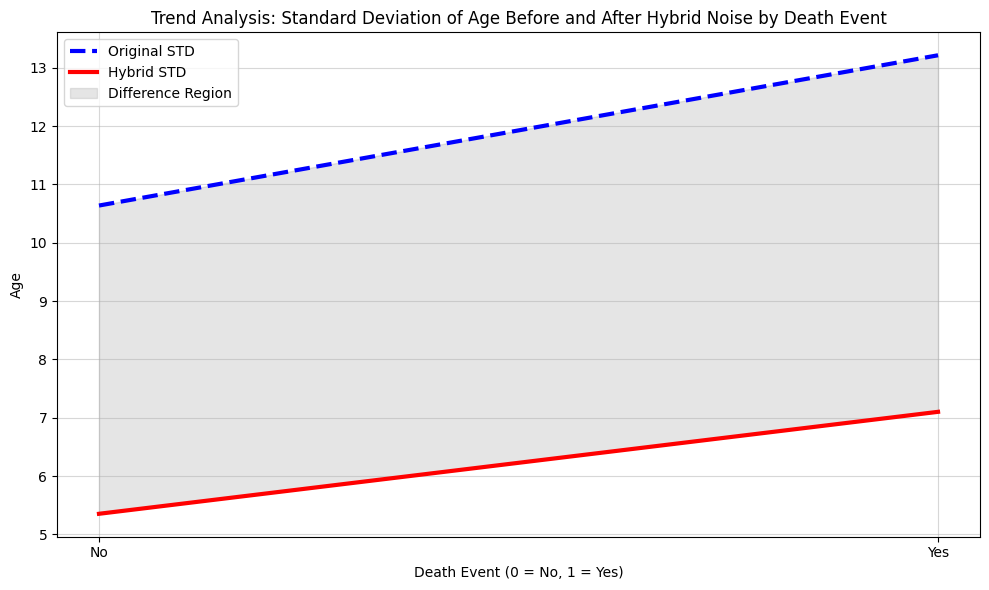

In [42]:
import matplotlib.pyplot as plt


# Calculate mean, median, and standard deviation of age for both original and hybrid noise, grouped by DEATH_EVENT
age_statistics = df.groupby('DEATH_EVENT')[['age_original', 'age_hybrid']].agg(['mean', 'median', 'std'])

# Plot Mean of age_original vs age_hybrid for DEATH_EVENT using a line plot
plt.figure(figsize=(10, 6))
plt.plot(age_statistics['age_original']['mean'], label='Original Mean', color='blue', linestyle='--', linewidth=3)
plt.plot(age_statistics['age_hybrid']['mean'], label='Hybrid Mean', color='red', linestyle='-', linewidth=3)
plt.fill_between(range(len(age_statistics)),
                 age_statistics['age_original']['mean'],
                 age_statistics['age_hybrid']['mean'],
                 color='gray', alpha=0.2, label='Difference Region')
plt.title('Trend Analysis: Mean of Age Before and After Hybrid Noise by Death Event')
plt.ylabel('Age')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Median of age_original vs age_hybrid for DEATH_EVENT using a line plot
plt.figure(figsize=(10, 6))
plt.plot(age_statistics['age_original']['median'], label='Original Median', color='blue', linestyle='--', linewidth=3)
plt.plot(age_statistics['age_hybrid']['median'], label='Hybrid Median', color='red', linestyle='-', linewidth=3)
plt.fill_between(range(len(age_statistics)),
                 age_statistics['age_original']['median'],
                 age_statistics['age_hybrid']['median'],
                 color='gray', alpha=0.2, label='Difference Region')
plt.title('Trend Analysis: Median of Age Before and After Hybrid Noise by Death Event')
plt.ylabel('Age')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Standard Deviation of age_original vs age_hybrid for DEATH_EVENT using a line plot
plt.figure(figsize=(10, 6))
plt.plot(age_statistics['age_original']['std'], label='Original STD', color='blue', linestyle='--', linewidth=3)
plt.plot(age_statistics['age_hybrid']['std'], label='Hybrid STD', color='red', linestyle='-', linewidth=3)
plt.fill_between(range(len(age_statistics)),
                 age_statistics['age_original']['std'],
                 age_statistics['age_hybrid']['std'],
                 color='gray', alpha=0.2, label='Difference Region')
plt.title('Trend Analysis: Standard Deviation of Age Before and After Hybrid Noise by Death Event')
plt.ylabel('Age')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


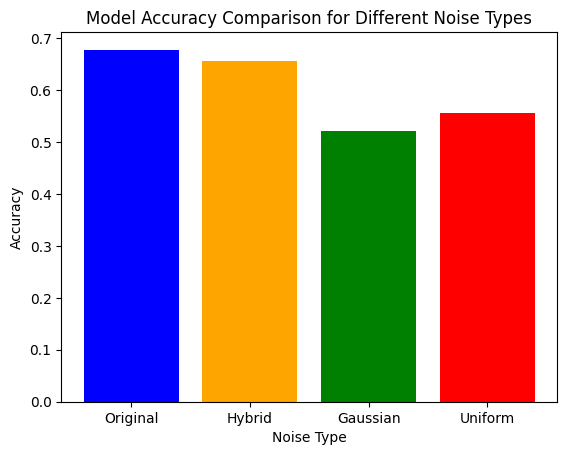

In [43]:
# Evaluate model for different noise types
accuracies = {}  # Initialize an empty dictionary to store accuracies

for X_train, X_test, noise_type in zip([X_train_orig, X_train_hybrid, X_train_gaussian, X_train_uniform],
                                       [X_test_orig, X_test_hybrid, X_test_gaussian, X_test_uniform],
                                       ['Original', 'Hybrid', 'Gaussian', 'Uniform']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for the current noise type
    accuracies[noise_type] = accuracy

    # ... (rest of the loop remains the same) ...


# Accuracy for each model and noise type
# Now you can access the accuracies from the dictionary
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Model Accuracy Comparison for Different Noise Types')
plt.xlabel('Noise Type')
plt.ylabel('Accuracy')
plt.show()